In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf

from core.functions import heatmap_corr
from core.functions import logistic_reg

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/raw/train.csv')

display(df.head())
display(df.shape)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


(58592, 44)

In [3]:
display(df.describe())
df.groupby('is_claim').size()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


is_claim
0    54844
1     3748
dtype: int64

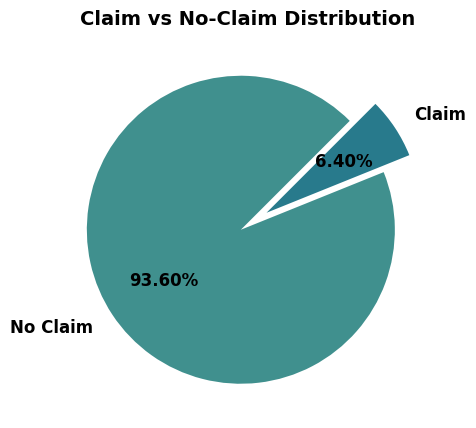

In [4]:
colors = sns.color_palette("crest")[2:4]
fig, ax = plt.subplots(figsize=(6, 5))
df['is_claim'].value_counts().plot(kind = 'pie', ax=ax, labels = ['No Claim', 'Claim'], colors = colors, 
                                   autopct='%1.2f%%', # inserir os porcentuais na 'fatia da pizza'
                                   explode = [0.05, 0.15], labeldistance=1.15, startangle=45,
                                   textprops={'fontsize':12, 'fontweight': 'bold'})
ax.set_title('Claim vs No-Claim Distribution', fontsize=14, fontweight='bold')
ax.set_ylabel('');

In [5]:
display(df.dtypes, df.isna().sum())

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [6]:
for cat_col in df.columns:
    if df[cat_col].dtype == 'object':
        #df[cat_col] = df[cat_col].astype('str')
        df[cat_col] = df[cat_col].astype('category')

In [7]:
df.dtypes

policy_id                           category
policy_tenure                        float64
age_of_car                           float64
age_of_policyholder                  float64
area_cluster                        category
population_density                     int64
make                                   int64
segment                             category
model                               category
fuel_type                           category
max_torque                          category
max_power                           category
engine_type                         category
airbags                                int64
is_esc                              category
is_adjustable_steering              category
is_tpms                             category
is_parking_sensors                  category
is_parking_camera                   category
rear_brakes_type                    category
displacement                           int64
cylinder                               int64
transmissi

In [8]:
max_torque_str = df.loc[:,'max_torque']
max_torque_num = [entry.split('N')[0] for entry in max_torque_str]

max_power_str = df.loc[:,'max_power']
max_power_num = [entry.split('b')[0] for entry in max_power_str]

print(max_torque_num[:15])
print(max_power_num[:15])

['60', '60', '60', '113', '91', '250', '200', '113', '250', '113', '60', '82.1', '113', '113', '60']
['40.36', '40.36', '40.36', '88.50', '67.06', '113.45', '88.77', '88.50', '113.45', '88.50', '40.36', '55.92', '88.50', '88.50', '40.36']


In [9]:
# Inserimos as novas colunas nos lugares desejados
pos = df.columns.get_loc('max_torque')
df.insert(pos + 1, 'max_torque_num', max_torque_num)

pos_2 = df.columns.get_loc('max_power')
df.insert(pos_2 + 1, 'max_power_num', max_power_num)



In [10]:
df['max_torque_num']  = df['max_torque_num'].astype('float')
df['max_power_num']  = df['max_power_num'].astype('float')

print(df['max_torque_num'].dtype, df['max_power_num'].dtype)


float64 float64


In [11]:
display(df.head())
df.describe()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_torque_num,max_power,max_power_num,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,60.0,40.36bhp@6000rpm,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,60.0,40.36bhp@6000rpm,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,60.0,40.36bhp@6000rpm,40.36,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,113.0,88.50bhp@6000rpm,88.50,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,91.0,67.06bhp@5500rpm,67.06,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


,policy_tenure,age_of_car,age_of_policyholder,population_density,make,max_torque_num,max_power_num,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,134.450937,78.976765,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,73.146794,27.699259,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,60.000000,40.360000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,60.000000,40.360000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,113.000000,88.500000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,200.000000,97.890000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,250.000000,118.360000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [12]:
#Split the original Dataset into different Datasets according to the variable types
df_int = df.select_dtypes(include = 'int64').copy()
df_float = df.select_dtypes(include = 'float64').copy()
df_float['is_claim'] = df['is_claim'].astype('int64')
df_cat = df.select_dtypes(include = 'category').copy()
df_cat['is_claim'] = df['is_claim'].astype('int64')


In [13]:
display(df_int.head())
df_int.describe()

,population_density,make,airbags,displacement,cylinder,gear_box,length,width,height,gross_weight,ncap_rating,is_claim
0,4990,1,2,796,3,5,3445,1515,1475,1185,0,0
1,27003,1,2,796,3,5,3445,1515,1475,1185,0,0
2,4076,1,2,796,3,5,3445,1515,1475,1185,0,0
3,21622,1,2,1197,4,5,3995,1735,1515,1335,2,0
4,34738,2,2,999,3,5,3731,1579,1490,1155,2,0


,population_density,make,airbags,displacement,cylinder,gear_box,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


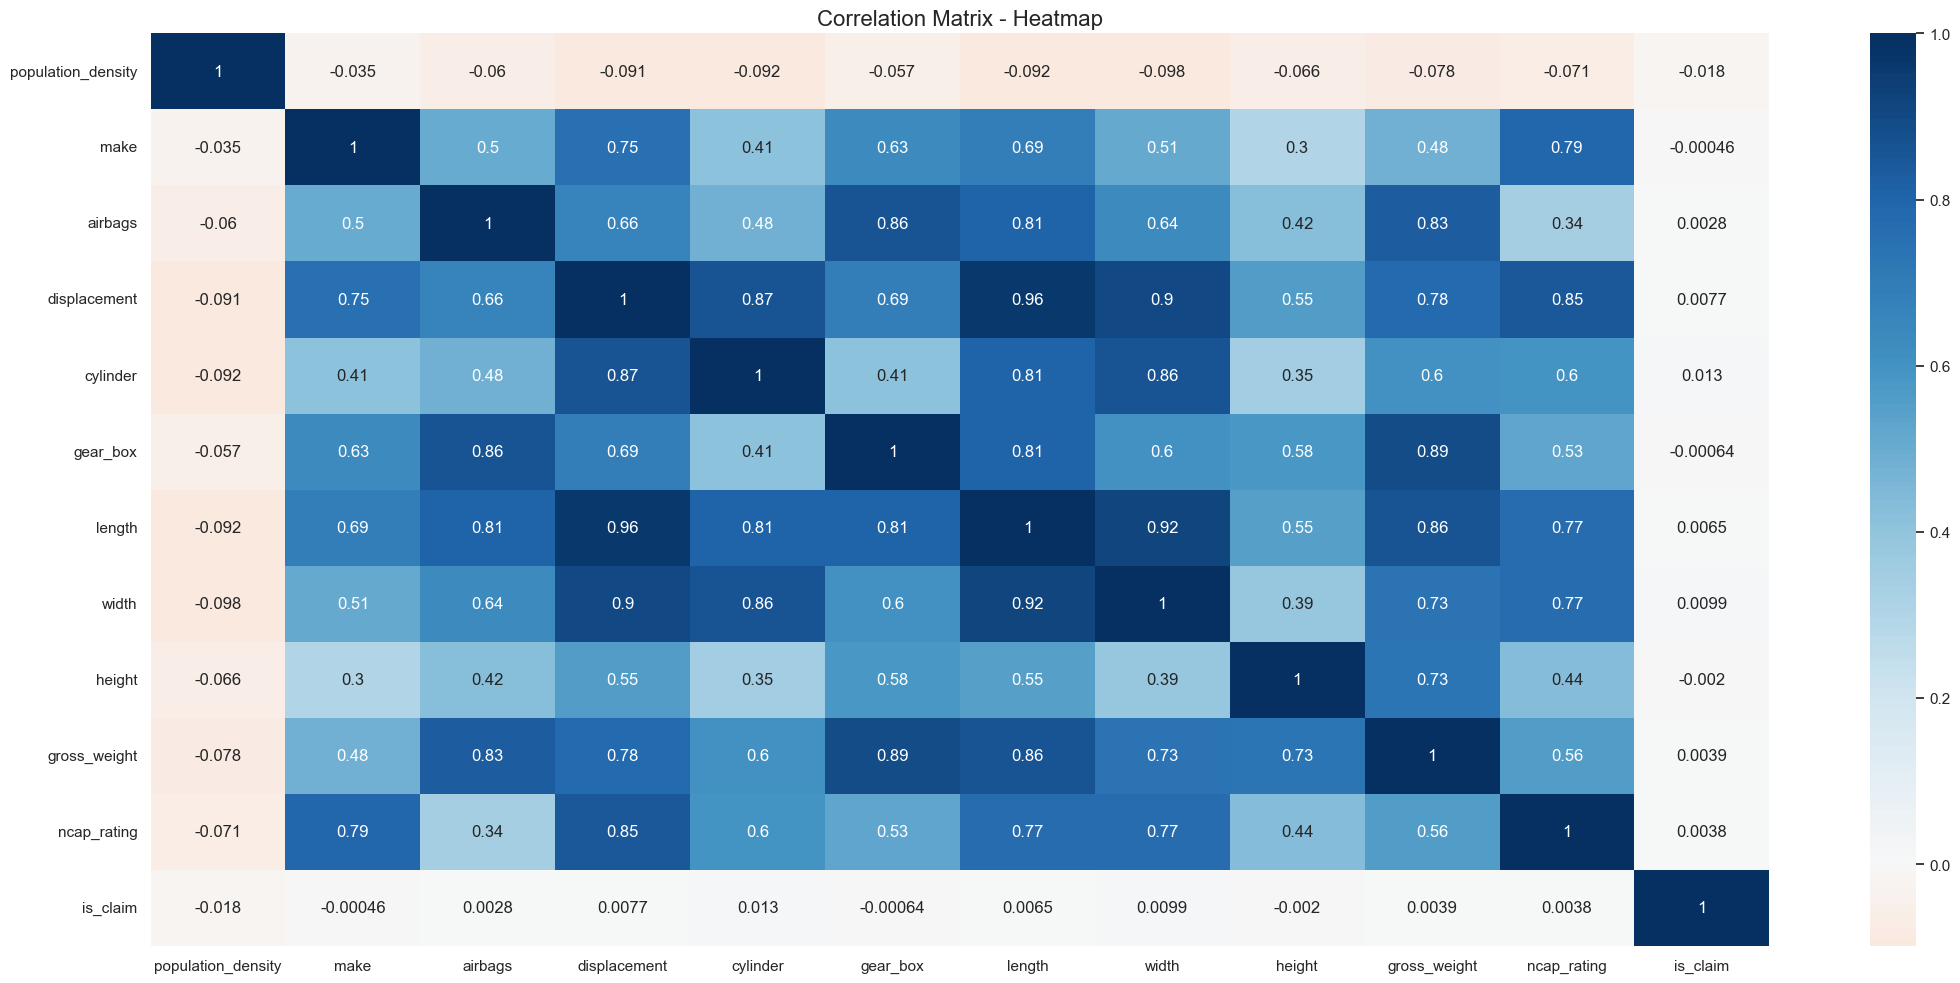

In [14]:
heatmap_corr(df_int)

C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3704551214.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0][1].get_yticks()]);
C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3704551214.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[1][1].get_yticks()]);
C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3704551214.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2][0].get_yticks()]);


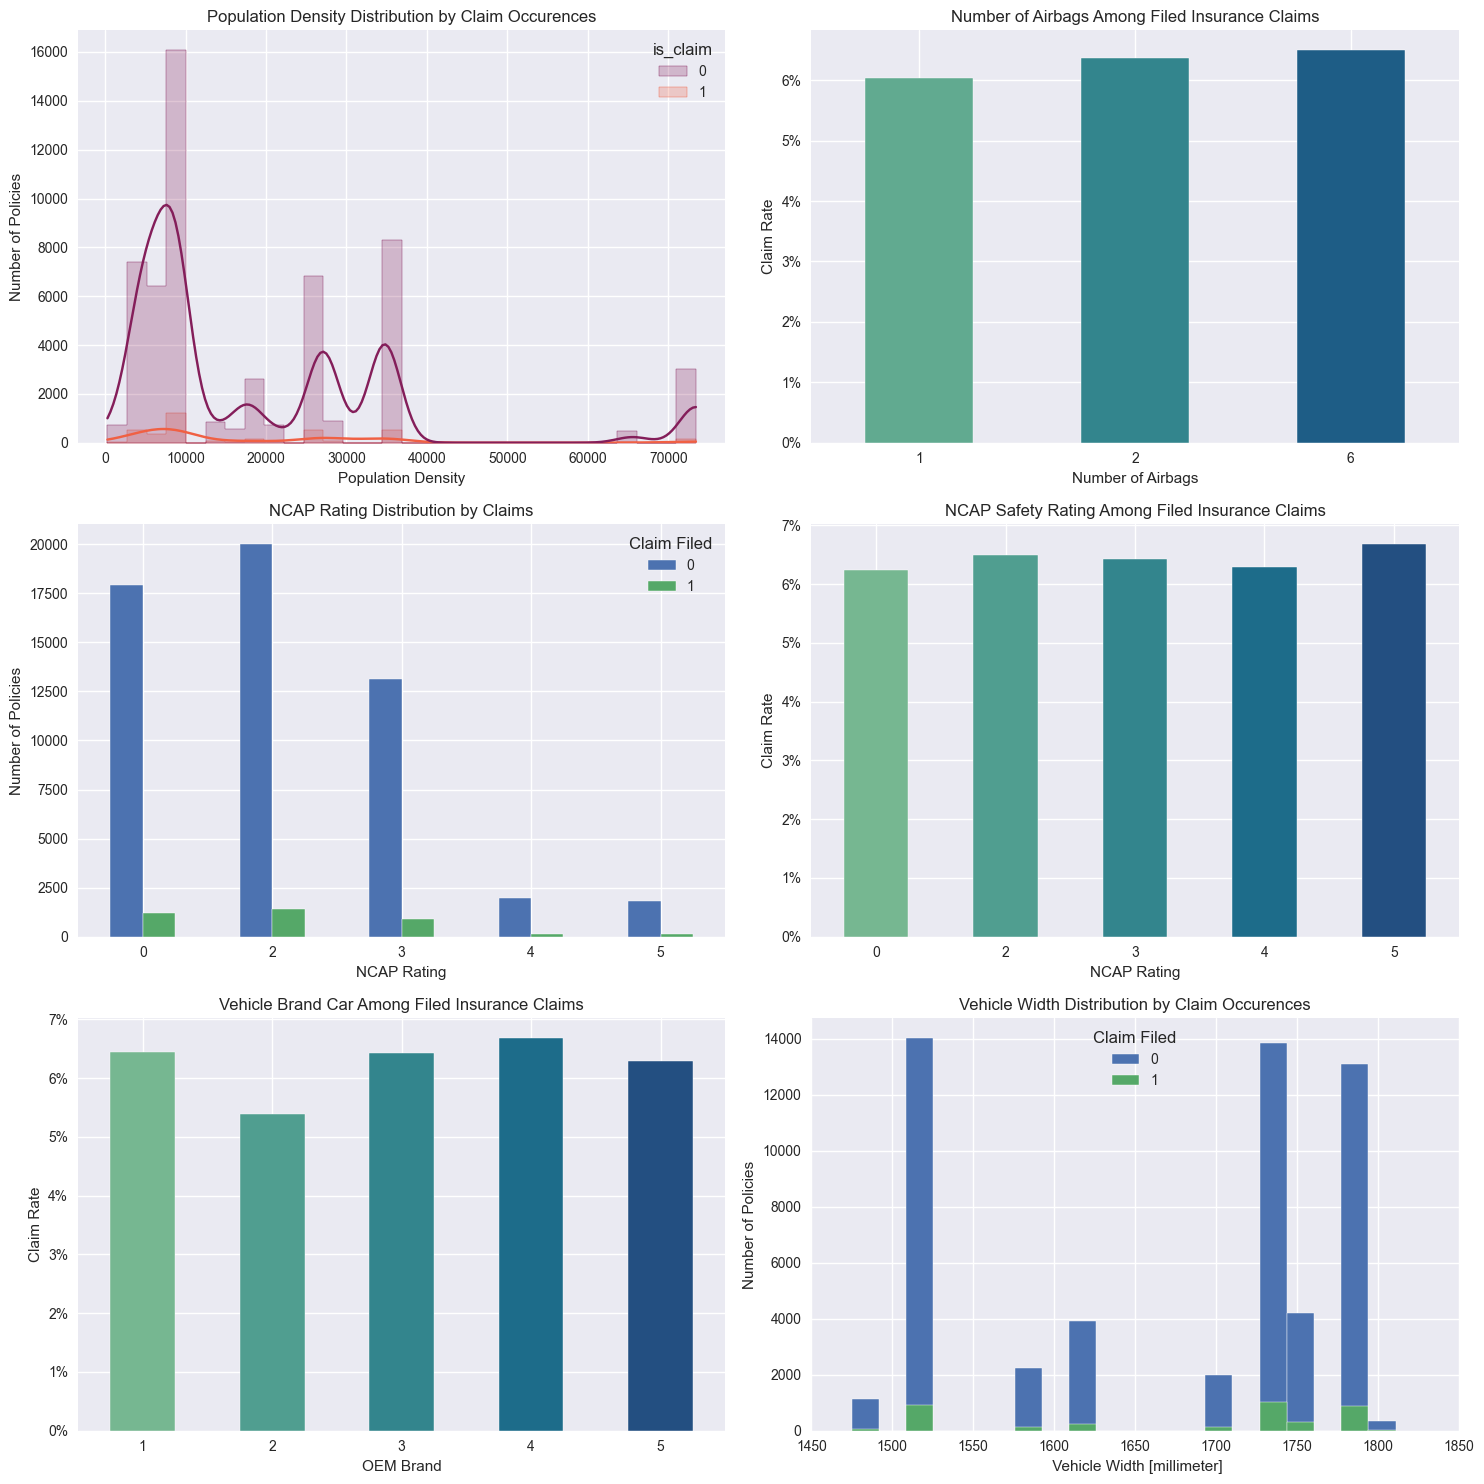

In [15]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(15, 15))

sns.histplot(data=df_int, x='population_density', hue='is_claim', bins=30, kde=True, element="step", palette='rocket', ax=ax[0][0])
ax[0][0].set(title = 'Population Density Distribution by Claim Occurences', xlabel = 'Population Density', ylabel = 'Number of Policies');

colors = sns.color_palette('crest', n_colors=len(df_int['airbags'].unique()))
df_int.groupby('airbags')['is_claim'].mean().plot(kind = 'bar', color = colors, ax = ax[0][1]);
ax[0][1].set(title = 'Number of Airbags Among Filed Insurance Claims', xlabel = 'Number of Airbags', ylabel = 'Claim Rate');
ax[0][1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[0][1].get_yticks()]);
ax[0][1].xaxis.set_tick_params(labelrotation=0)

var_ct_ncap = pd.crosstab(index=df['ncap_rating'], columns=df['is_claim'])
var_ct_ncap.plot(kind = 'bar', ax = ax[1][0])
ax[1][0].set(title = 'NCAP Rating Distribution by Claims', xlabel = 'NCAP Rating', ylabel = 'Number of Policies');
ax[1][0].legend(title='Claim Filed')
ax[1][0].xaxis.set_tick_params(labelrotation=0)

colors = sns.color_palette('crest', n_colors=len(df_int['ncap_rating'].unique()))
df_int.groupby('ncap_rating')['is_claim'].mean().plot(kind = 'bar', color = colors, ax = ax[1][1]);
ax[1][1].set(title = 'NCAP Safety Rating Among Filed Insurance Claims', xlabel = 'NCAP Rating', ylabel = 'Claim Rate');
ax[1][1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[1][1].get_yticks()]);
ax[1][1].xaxis.set_tick_params(labelrotation=0)

colors = sns.color_palette('crest', n_colors=len(df_int['ncap_rating'].unique()))
df_int.groupby('make')['is_claim'].mean().plot(kind = 'bar', color = colors, ax = ax[2][0]);
ax[2][0].set(title = 'Vehicle Brand Car Among Filed Insurance Claims', xlabel = 'OEM Brand', ylabel = 'Claim Rate');
ax[2][0].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2][0].get_yticks()]);
ax[2][0].xaxis.set_tick_params(labelrotation=0)

df_int.groupby('is_claim')['width'].plot(kind='hist', bins = 20, legend = True, ax= ax[2][1], xlim = [1450, 1850])
ax[2][1].set(title = 'Vehicle Width Distribution by Claim Occurences', xlabel = ' Vehicle Width [millimeter]', ylabel = 'Number of Policies');
ax[2][1].legend(title='Claim Filed')
plt.tight_layout()

In [16]:
display(df_float.head())
df_float.describe()

,policy_tenure,age_of_car,age_of_policyholder,max_torque_num,max_power_num,turning_radius,is_claim
0,0.515874,0.05,0.644231,60.0,40.36,4.6,0
1,0.672619,0.02,0.375000,60.0,40.36,4.6,0
2,0.841110,0.02,0.384615,60.0,40.36,4.6,0
3,0.900277,0.11,0.432692,113.0,88.50,4.8,0
4,0.596403,0.11,0.634615,91.0,67.06,5.0,0


,policy_tenure,age_of_car,age_of_policyholder,max_torque_num,max_power_num,turning_radius,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,134.450937,78.976765,4.852893,0.063968
std,0.414156,0.056721,0.122886,73.146794,27.699259,0.228061,0.244698
min,0.002735,0.000000,0.288462,60.000000,40.360000,4.500000,0.000000
25%,0.210250,0.020000,0.365385,60.000000,40.360000,4.600000,0.000000
50%,0.573792,0.060000,0.451923,113.000000,88.500000,4.800000,0.000000
75%,1.039104,0.110000,0.548077,200.000000,97.890000,5.000000,0.000000
max,1.396641,1.000000,1.000000,250.000000,118.360000,5.200000,1.000000


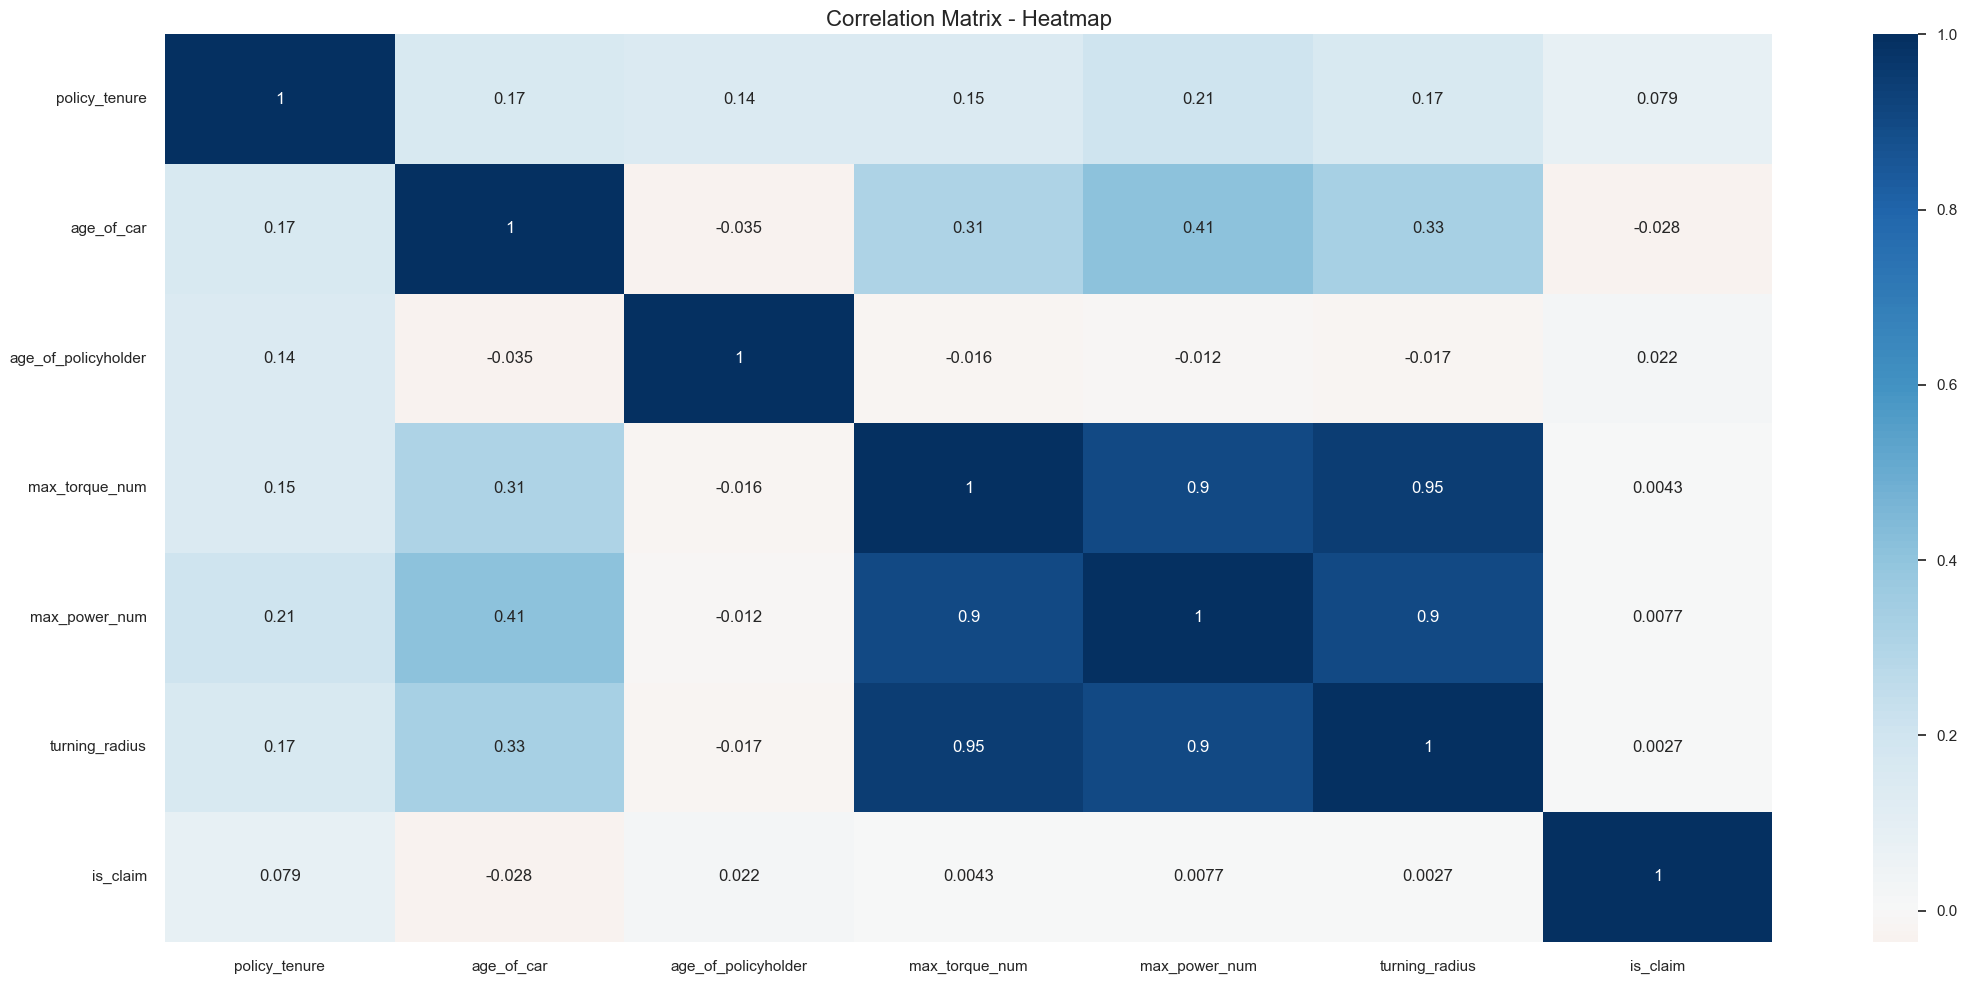

In [17]:
heatmap_corr(df_float)

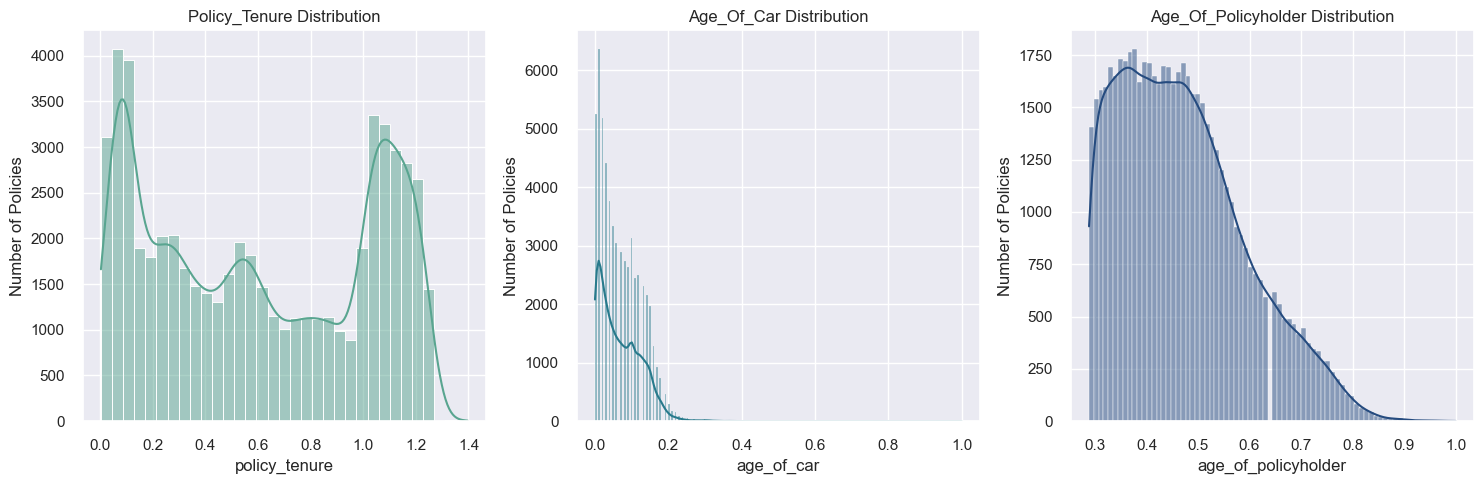

In [18]:
fig, ax = plt.subplots(ncols = 3, figsize=(15, 5))

cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder']

for (i, col) in enumerate(cols):
    sns.histplot(df_float[col], kde = True, ax=ax[i], color=sns.color_palette("crest")[2*i+1])
    ax[i].set(title = '{} Distribution'.format(col).title(), xlabel = col, ylabel = 'Number of Policies')

plt.tight_layout()
plt.show()



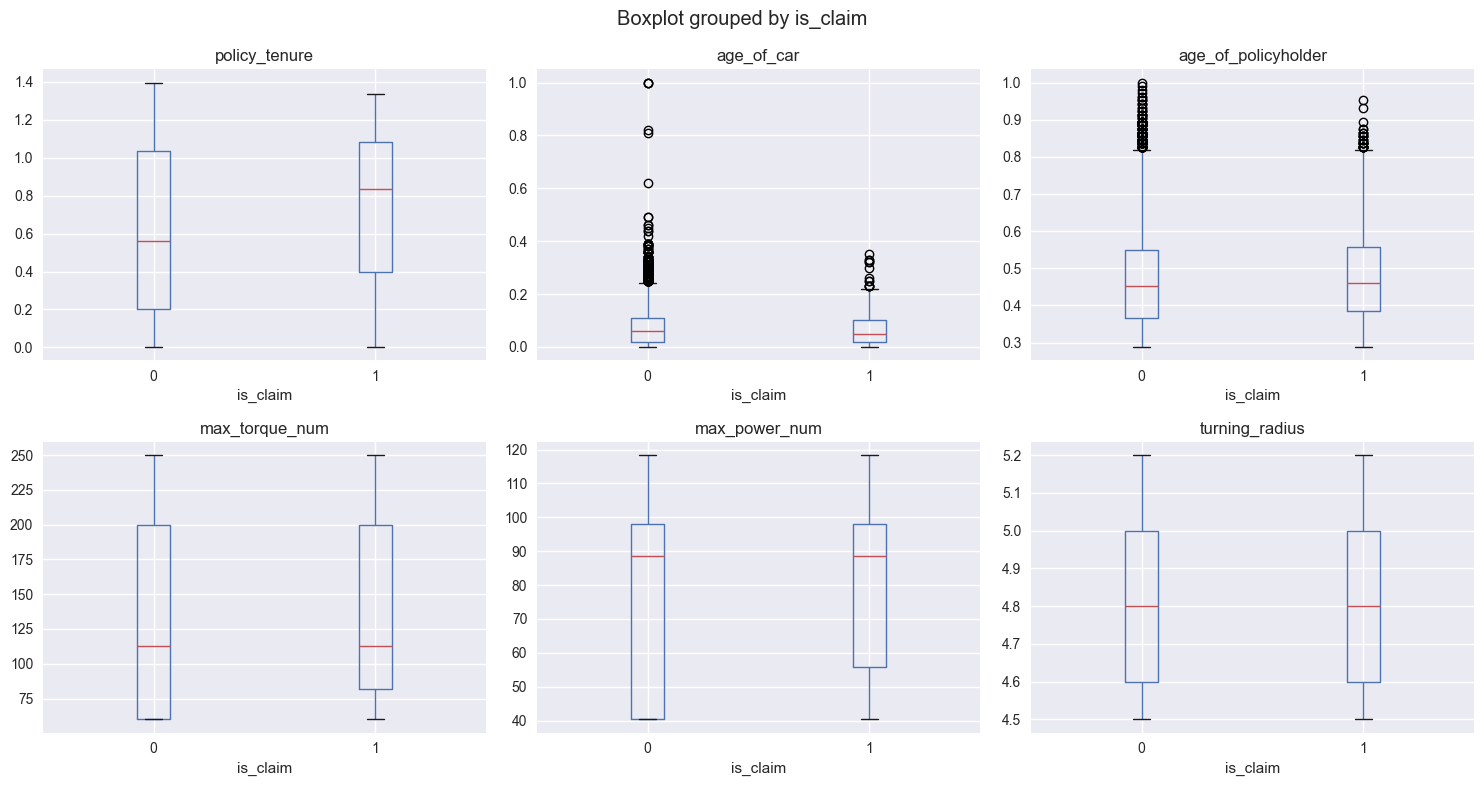

In [19]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 8))

ax = ax.flatten() # achata o array ax, transforma o array 2D (2 linhas x 3 colunas) em um array 1D - vetor (6 itens).
for i, col in enumerate(df_float.columns):
    if col == 'is_claim':
        continue
    df_float.boxplot(column=col, by='is_claim', ax=ax[i])
    ax[i].set_title(col)
plt.tight_layout()

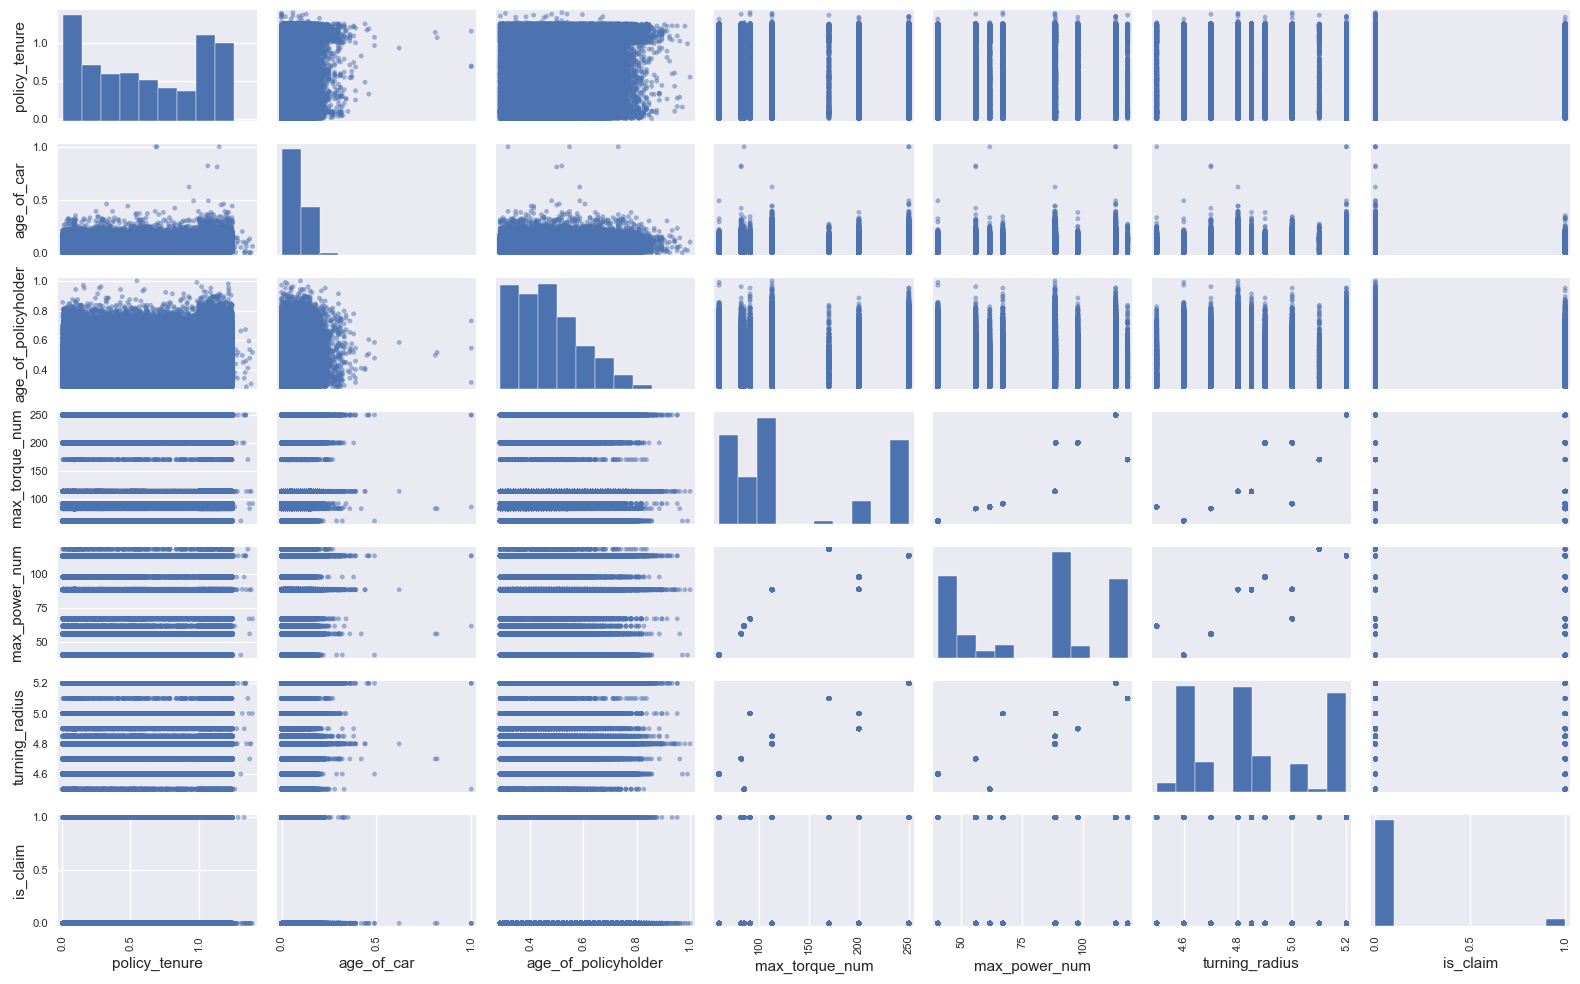

In [20]:
pd.plotting.scatter_matrix(df_float, figsize=[16, 10])
plt.tight_layout()
plt.show();

In [21]:
# Die folgenden Spalten können entfernt werden, da die entsprechenden Angaben bereits in df_float enthalten sind.
if 'max_torque' in df_cat.columns:
    df_cat = df_cat.drop('max_torque', axis = 1)
   
if 'max_power' in df_cat.columns:
    df_cat = df_cat.drop('max_power', axis = 1)

display(df_cat.head())
df_cat.shape

,policy_id,area_cluster,segment,model,fuel_type,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,is_claim
0,ID00001,C1,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,C2,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,C3,A,M1,CNG,F8D Petrol Engine,No,No,No,Yes,No,Drum,Manual,Power,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,C4,C1,M2,Petrol,1.2 L K12N Dualjet,Yes,Yes,No,Yes,Yes,Drum,Automatic,Electric,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
4,ID00005,C5,A,M3,Petrol,1.0 SCe,No,No,No,No,Yes,Drum,Automatic,Electric,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,0


(58592, 27)

In [22]:
for col in df_cat.columns:
    if col != 'policy_id' and col != 'is_claim' :
        var_ct = pd.crosstab(index = df_cat['is_claim'], columns = df_cat[col])
        var_ct = var_ct.sort_values(by=1, axis=1, ascending=False)
        var_ct_perc = pd.crosstab(index = df_cat['is_claim'], columns = df_cat[col], normalize = 'columns')
        var_ct_perc = var_ct_perc.sort_values(by=1, axis=1, ascending=False)
        display(var_ct)
        display(var_ct_perc)

area_cluster,C8,C2,C3,C5,C14,C13,C10,C9,C7,C12,C1,C11,C19,C6,C4,C15,C21,C18,C16,C17,C22,C20
is_claim,,,,,,,,,,,,,,,,,,,,,,
0,12700,6822,5668,6576,3379,3228,3007,2598,2058,1502,1392,1140,881,835,614,733,350,216,378,473,190,104
1,954,520,433,403,281,195,148,136,109,87,76,72,71,55,51,38,29,26,23,19,17,5


area_cluster,C18,C22,C14,C4,C21,C19,C3,C2,C8,C6,C11,C5,C16,C13,C12,C1,C7,C9,C15,C10,C20,C17
is_claim,,,,,,,,,,,,,,,,,,,,,,
0,0.892562,0.917874,0.923224,0.923308,0.923483,0.92542,0.929028,0.929175,0.93013,0.938202,0.940594,0.942255,0.942643,0.943032,0.945249,0.948229,0.9497,0.950256,0.950713,0.95309,0.954128,0.961382
1,0.107438,0.082126,0.076776,0.076692,0.076517,0.07458,0.070972,0.070825,0.06987,0.061798,0.059406,0.057745,0.057357,0.056968,0.054751,0.051771,0.0503,0.049744,0.049287,0.04691,0.045872,0.038618


segment,B2,A,C2,B1,C1,Utility
is_claim,,,,,,
0,17058,16275,13117,3929,3329,1136
1,1256,1046,901,244,228,73


segment,B2,C2,C1,A,Utility,B1
is_claim,,,,,,
0,0.931419,0.935725,0.935901,0.939611,0.93962,0.941529
1,0.068581,0.064275,0.064099,0.060389,0.06038,0.058471


model,M6,M1,M4,M8,M7,M9,M3,M5,M2,M10,M11
is_claim,,,,,,,,,,,
0,12837,14030,13117,3929,2739,1981,2245,1482,1000,1136,348
1,939,918,901,244,201,133,128,116,80,73,15


model,M2,M5,M7,M6,M4,M9,M1,M10,M8,M3,M11
is_claim,,,,,,,,,,,
0,0.925926,0.927409,0.931633,0.931838,0.935725,0.937086,0.938587,0.93962,0.941529,0.94606,0.958678
1,0.074074,0.072591,0.068367,0.068162,0.064275,0.062914,0.061413,0.06038,0.058471,0.05394,0.041322


fuel_type,Petrol,CNG,Diesel
is_claim,,,
0,19169,19095,16580
1,1363,1235,1150


fuel_type,Petrol,Diesel,CNG
is_claim,,,
0,0.933616,0.935138,0.939252
1,0.066384,0.064862,0.060748


engine_type,K Series Dual jet,F8D Petrol Engine,1.5 L U2 CRDi,K10C,1.2 L K Series Engine,i-DTEC,1.0 SCe,1.5 Turbocharged Revotorq,1.2 L K12N Dualjet,G12B,1.5 Turbocharged Revotron
is_claim,,,,,,,,,,,
0,12837,14030,13117,3929,2739,1981,2245,1482,1000,1136,348
1,939,918,901,244,201,133,128,116,80,73,15


engine_type,1.2 L K12N Dualjet,1.5 Turbocharged Revotorq,1.2 L K Series Engine,K Series Dual jet,1.5 L U2 CRDi,i-DTEC,F8D Petrol Engine,G12B,K10C,1.0 SCe,1.5 Turbocharged Revotron
is_claim,,,,,,,,,,,
0,0.925926,0.927409,0.931633,0.931838,0.935725,0.937086,0.938587,0.93962,0.941529,0.94606,0.958678
1,0.074074,0.072591,0.068367,0.068162,0.064275,0.062914,0.061413,0.06038,0.058471,0.05394,0.041322


is_esc,No,Yes
is_claim,,
0,37640,17204
1,2551,1197


is_esc,Yes,No
is_claim,,
0,0.934949,0.936528
1,0.065051,0.063472


is_adjustable_steering,Yes,No
is_claim,,
0,33156,21688
1,2370,1378


is_adjustable_steering,Yes,No
is_claim,,
0,0.933288,0.940258
1,0.066712,0.059742


is_tpms,No,Yes
is_claim,,
0,41727,13117
1,2847,901


is_tpms,Yes,No
is_claim,,
0,0.935725,0.936129
1,0.064275,0.063871


is_parking_sensors,Yes,No
is_claim,,
0,52599,2245
1,3620,128


is_parking_sensors,Yes,No
is_claim,,
0,0.935609,0.94606
1,0.064391,0.05394


is_parking_camera,No,Yes
is_claim,,
0,33414,21430
1,2290,1458


is_parking_camera,No,Yes
is_claim,,
0,0.935862,0.936298
1,0.064138,0.063702


rear_brakes_type,Drum,Disc
is_claim,,
0,41727,13117
1,2847,901


rear_brakes_type,Disc,Drum
is_claim,,
0,0.935725,0.936129
1,0.064275,0.063871


transmission_type,Manual,Automatic
is_claim,,
0,35743,19101
1,2438,1310


transmission_type,Automatic,Manual
is_claim,,
0,0.935819,0.936146
1,0.064181,0.063854


steering_type,Power,Electric,Manual
is_claim,,,
0,31424,22284,1136
1,2078,1597,73


steering_type,Electric,Power,Manual
is_claim,,,
0,0.933127,0.937974,0.93962
1,0.066873,0.062026,0.06038


is_front_fog_lights,Yes,No
is_claim,,
0,31674,23170
1,2254,1494


is_front_fog_lights,Yes,No
is_claim,,
0,0.933565,0.939426
1,0.066435,0.060574


is_rear_window_wiper,No,Yes
is_claim,,
0,38988,15856
1,2646,1102


is_rear_window_wiper,Yes,No
is_claim,,
0,0.935016,0.936446
1,0.064984,0.063554


is_rear_window_washer,No,Yes
is_claim,,
0,38988,15856
1,2646,1102


is_rear_window_washer,Yes,No
is_claim,,
0,0.935016,0.936446
1,0.064984,0.063554


is_rear_window_defogger,No,Yes
is_claim,,
0,35659,19185
1,2418,1330


is_rear_window_defogger,Yes,No
is_claim,,
0,0.935169,0.936497
1,0.064831,0.063503


is_brake_assist,Yes,No
is_claim,,
0,30041,24803
1,2136,1612


is_brake_assist,Yes,No
is_claim,,
0,0.933617,0.938974
1,0.066383,0.061026


is_power_door_locks,Yes,No
is_claim,,
0,39678,15166
1,2757,991


is_power_door_locks,Yes,No
is_claim,,
0,0.93503,0.938664
1,0.06497,0.061336


is_central_locking,Yes,No
is_claim,,
0,39678,15166
1,2757,991


is_central_locking,Yes,No
is_claim,,
0,0.93503,0.938664
1,0.06497,0.061336


is_power_steering,Yes,No
is_claim,,
0,53708,1136
1,3675,73


is_power_steering,Yes,No
is_claim,,
0,0.935957,0.93962
1,0.064043,0.06038


is_driver_seat_height_adjustable,Yes,No
is_claim,,
0,32022,22822
1,2269,1479


is_driver_seat_height_adjustable,Yes,No
is_claim,,
0,0.933831,0.939138
1,0.066169,0.060862


is_day_night_rear_view_mirror,No,Yes
is_claim,,
0,34042,20802
1,2267,1481


is_day_night_rear_view_mirror,Yes,No
is_claim,,
0,0.933537,0.937564
1,0.066463,0.062436


is_ecw,Yes,No
is_claim,,
0,39678,15166
1,2757,991


is_ecw,Yes,No
is_claim,,
0,0.93503,0.938664
1,0.06497,0.061336


is_speed_alert,Yes,No
is_claim,,
0,54496,348
1,3733,15


is_speed_alert,Yes,No
is_claim,,
0,0.935891,0.958678
1,0.064109,0.041322


C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3563455018.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby(col)['is_claim'].mean().sort_values(ascending=False).plot(kind = 'bar', color = colors, ax = ax[2*i + 1])
C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3563455018.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2*i + 1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2*i + 1].get_yticks()])
C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3563455018.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

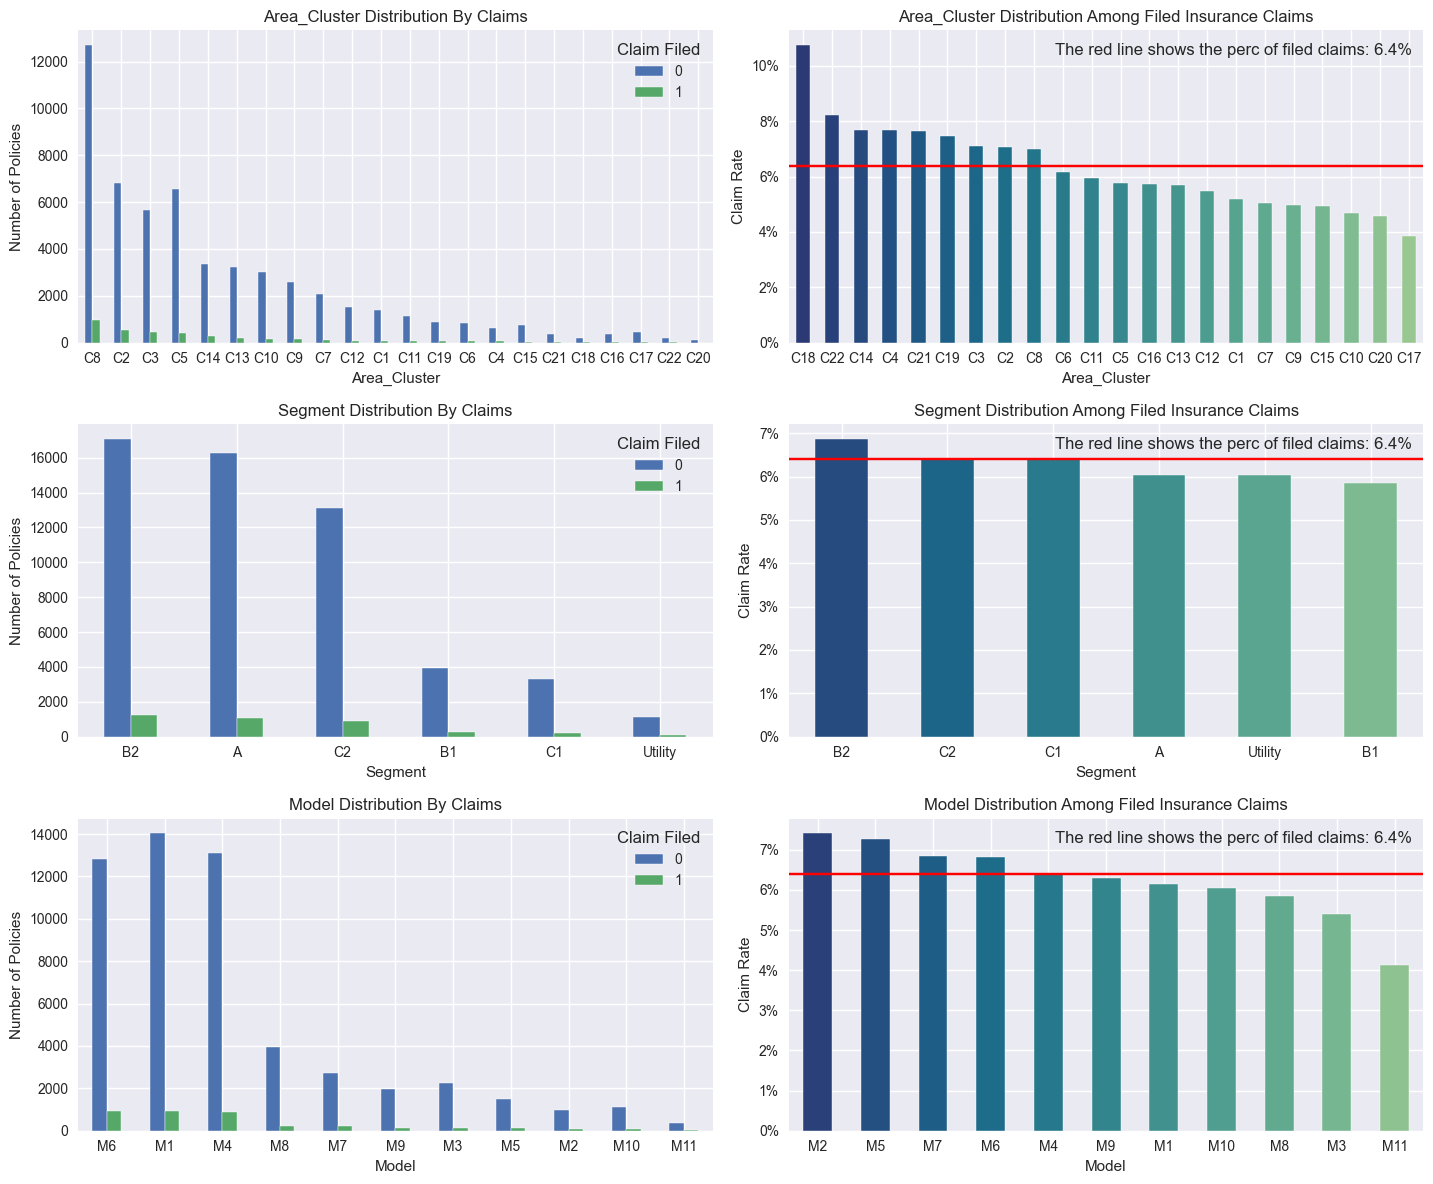

In [23]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(15, 12))
ax = ax.flatten()

cols = ['area_cluster', 'segment', 'model']

for (i, col) in enumerate(cols):
    var_ct = pd.crosstab(index = df_cat[col], columns = df_cat['is_claim'])
    var_ct = var_ct.sort_values(by=1, ascending=False)
    var_ct.plot(kind = 'bar', ax = ax[2*i])
    ax[2*i].set(title = '{} Distribution by Claims'.format(col).title(), xlabel = col.title(), ylabel = 'Number of Policies')
    ax[2*i].legend(title='Claim Filed')
    ax[2*i].xaxis.set_tick_params(labelrotation=0);
    
    colors = sns.color_palette('crest', n_colors=len(df_cat[col].unique()))[::-1] # Paleta invertida: mais escuro = maior incidência
    df_cat.groupby(col)['is_claim'].mean().sort_values(ascending=False).plot(kind = 'bar', color = colors, ax = ax[2*i + 1])
    ax[2*i + 1].set(title = '{} Distribution Among Filed Insurance Claims'.format(col).title(), xlabel = col.title(), ylabel = 'Claim Rate')
    ax[2*i + 1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[2*i + 1].get_yticks()])
    ax[2*i + 1].xaxis.set_tick_params(labelrotation=0)
    ax[2*i + 1].axhline(color='red', y = df_cat['is_claim'].mean());
    ax[2*i + 1].text(transform=ax[2*i + 1].transAxes, 
                     s = 'The red line shows the perc of filed claims: {}%'.format(round(df_cat['is_claim'].mean()*100, 2)), x =0.42, y=0.92)
    
plt.tight_layout()

C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3569660586.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cat.groupby('engine_type')['is_claim'].mean().sort_values(ascending=False).plot(kind = 'bar', color = colors, ax = ax[1])
C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\3569660586.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[1].get_yticks()])


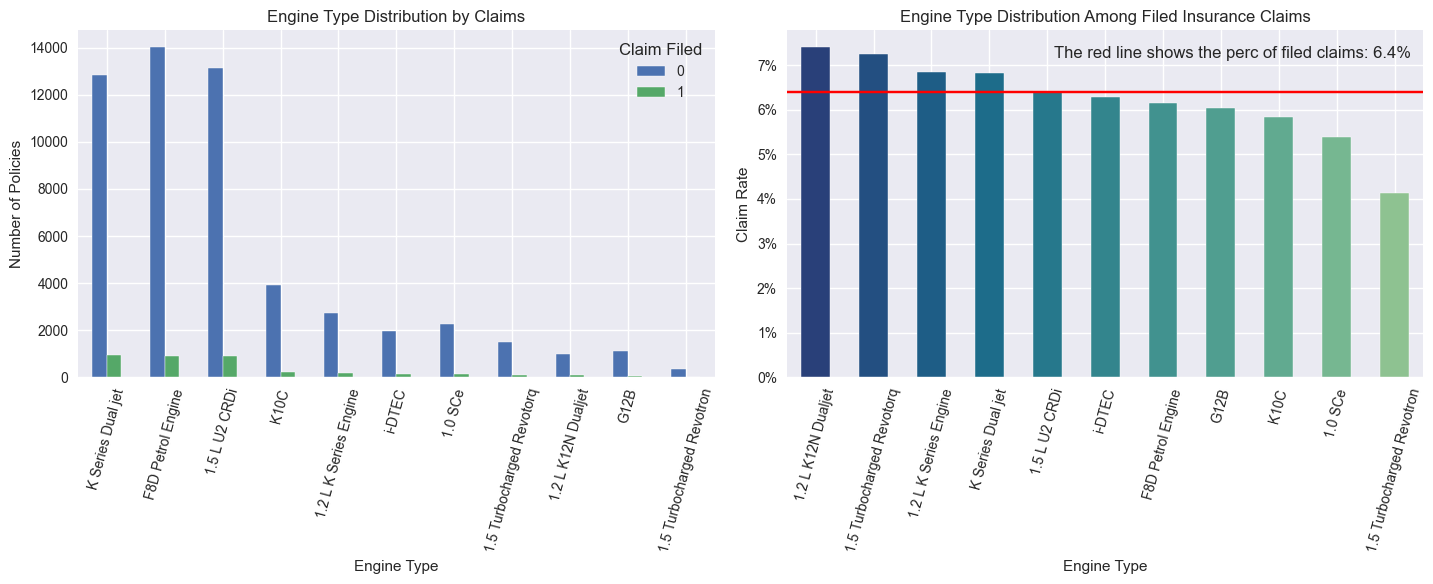

In [24]:
fig, ax = plt.subplots(ncols = 2, figsize=(15, 6))

var_ct = pd.crosstab(index = df_cat['engine_type'], columns = df_cat['is_claim'])
var_ct = var_ct.sort_values(by=1, ascending=False)
var_ct.plot(kind = 'bar', ax = ax[0])
ax[0].set(title = 'Engine Type Distribution by Claims', xlabel = 'Engine Type', ylabel = 'Number of Policies')
ax[0].legend(title='Claim Filed')
ax[0].xaxis.set_tick_params(labelrotation=75);

colors = sns.color_palette('crest', n_colors=len(df_cat[col].unique()))[::-1] # [::-1] Paleta invertida: mais escuro = maior incidência
df_cat.groupby('engine_type')['is_claim'].mean().sort_values(ascending=False).plot(kind = 'bar', color = colors, ax = ax[1])
ax[1].set(title = 'Engine Type Distribution Among Filed Insurance Claims', xlabel = 'Engine Type', ylabel = 'Claim Rate')
ax[1].set_yticklabels(['{:.0f}%'.format(x*100) for x in ax[1].get_yticks()])
ax[1].xaxis.set_tick_params(labelrotation=75)
ax[1].axhline(color='red', y = df_cat['is_claim'].mean());
ax[1].text(transform=ax[1].transAxes, 
                     s = 'The red line shows the perc of filed claims: {}%'.format(round(df_cat['is_claim'].mean()*100, 2)), x =0.42, y=0.92)
    
plt.tight_layout()

In [25]:
col_df_cat_is = [cat_is for cat_is in df_cat.columns if cat_is.startswith('is_')]
df_ausstattung = pd.concat([df_cat[['policy_id']], df[col_df_cat_is]], axis=1)
display(df_ausstattung.head())
df_ausstattung.shape


,policy_id,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,is_claim
0,ID00001,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID00002,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
2,ID00003,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
3,ID00004,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
4,ID00005,No,No,No,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,0


(58592, 19)

In [26]:
df_means = pd.DataFrame({
    'feature': [], 
    'yes': [],
    'no' : []
})

for i, feature in enumerate(df_ausstattung.columns):
    if feature == 'is_claim':
        continue
    if 'is_' in feature:
        df_means.loc[i, 'feature']=feature
        df_means.loc[i, 'yes'] = df_ausstattung[df_ausstattung[feature] == 'Yes']['is_claim'].mean()
        df_means.loc[i, 'no'] = df_ausstattung[df_ausstattung[feature] == 'No']['is_claim'].mean()

df_means
        

C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\1223670389.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'is_esc' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_means.loc[i, 'feature']=feature


,feature,yes,no
1,is_esc,0.065051,0.063472
2,is_adjustable_steering,0.066712,0.059742
3,is_tpms,0.064275,0.063871
4,is_parking_sensors,0.064391,0.053940
5,is_parking_camera,0.063702,0.064138
6,is_front_fog_lights,0.066435,0.060574
7,is_rear_window_wiper,0.064984,0.063554
8,is_rear_window_washer,0.064984,0.063554
9,is_rear_window_defogger,0.064831,0.063503
10,is_brake_assist,0.066383,0.061026


C:\Users\CLopes\AppData\Local\Temp\ipykernel_2560\1591620249.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]);


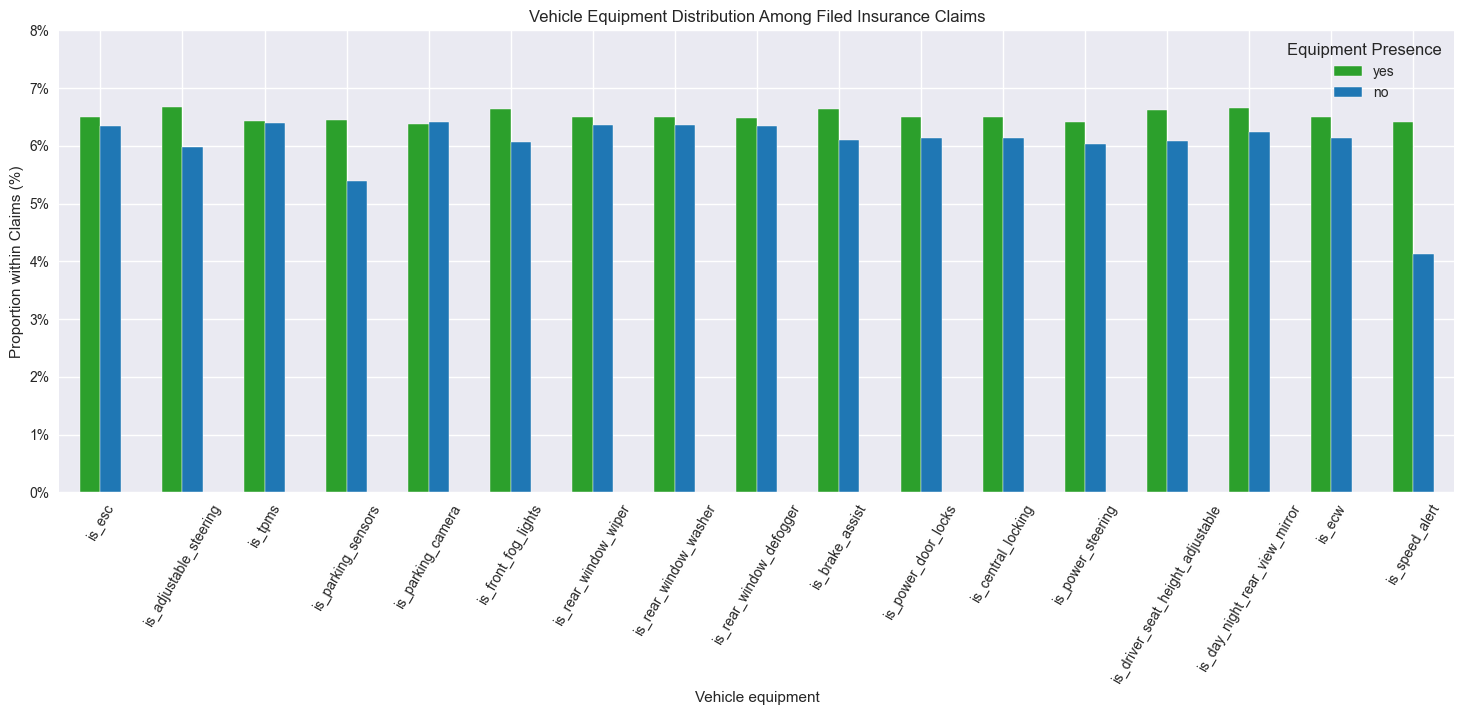

In [27]:
fig, ax = plt.subplots(figsize=(18, 6))
colors = ['#2ca02c', '#1f77b4']
df_means.set_index('feature').plot(kind='bar', color = colors, ax=ax); # rotulos do eixo x

ax.set(title = 'Vehicle Equipment Distribution Among Filed Insurance Claims', xlabel = 'Vehicle equipment', ylabel = 'Proportion within Claims (%)')
ax.set_ylim(0, 0.08)
ax.legend(title='Equipment Presence')
ax.xaxis.set_tick_params(labelrotation=60)
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in ax.get_yticks()]);


In [ ]:
from scipy.stats import chi2_contingency
for var in df_cat:
    if var == 'is_claim':
        continue
    if 'is_' in var:
        contingency_table = pd.crosstab(df_cat[var], df_cat["is_claim"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        contingency_table_rownorm = contingency_table.apply(lambda x: x/x.sum(),axis=1)
        print(contingency_table_rownorm)
        print("The chi2 (dof) is "+str(chi2)+" (dof="+str(dof)+").")
        if p < 0.05: #is significant
            print("The relationship is significant, p = "+str(p))
        else:
            print("The relationship is not significant, p = "+str(p))
        print("\n")

is_claim         0         1
is_esc                      
No        0.936528  0.063472
Yes       0.934949  0.065051
The chi2 (dof) is 0.4994751603896938 (dof=1).
The relationship is not significant, p = 0.47973082296004166


is_claim                       0         1
is_adjustable_steering                    
No                      0.940258  0.059742
Yes                     0.933288  0.066712
The chi2 (dof) is 11.231524925144885 (dof=1).
The relationship is significant, p = 0.0008041954126638532


is_claim         0         1
is_tpms                     
No        0.936129  0.063871
Yes       0.935725  0.064275
The chi2 (dof) is 0.022610862522515776 (dof=1).
The relationship is not significant, p = 0.8804734284234931


is_claim                   0         1
is_parking_sensors                    
No                  0.946060  0.053940
Yes                 0.935609  0.064391
The chi2 (dof) is 3.9806206811956772 (dof=1).
The relationship is significant, p = 0.046026600078480424


is_claim